# Anomaly Detection  

Detect and predict anomalies in the sensor data from the pump. The aim is to use exploratory data analysis (EDA) and regression analysis to determine the most effective predictor variables

## Step 3 Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn.ensemble import IsolationForest
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

#### 3.1: Load the data 

In [2]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\notebooks'

In [3]:
path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\processed'
os.chdir(path)

In [4]:
# import the tidy data from the Step #2
df=pd.read_csv('output_step_2.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      219521 non-null  int64  
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

#### 3.2: Data cleaning (as needed) before the EDA

In [6]:
del df['Unnamed: 0']

In [7]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])

#### 3.3: Graphical EDA

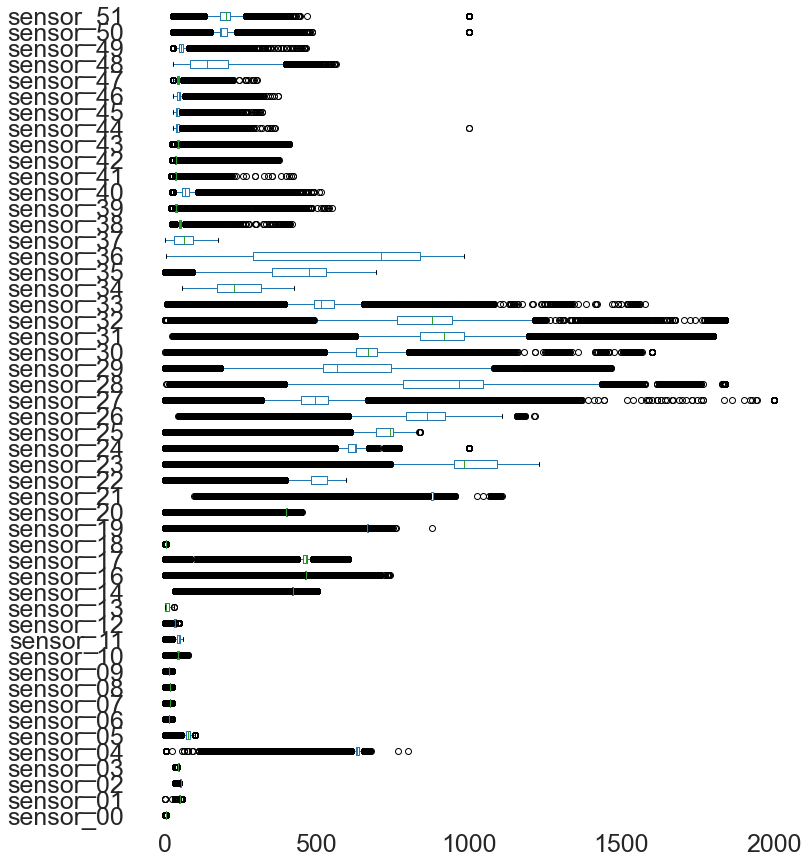

In [8]:
# Boxplots
df_boxplot = df.drop(['date'], axis=1)
boxplots = df_boxplot.boxplot(grid=False, vert=False,fontsize=25, figsize=(12,15))

In [ ]:
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("df-profile_report.html")

#### 3.4: Quantitative EDA

__Decision #1__: The variable "machine_status" is the response variable we will try to predict in this study. As it is a categorical variable, let's first code responses as follows to make them easier for anaylsis: 

0: BROKEN

1: NORMAL

99: RECOVERING

In [51]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

In [36]:
df[df['machine_status']=='BROKEN']

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date,machine_status_code
17125,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800,BROKEN,2018-04-12 21:55:00,0
24480,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400,BROKEN,2018-04-18 00:30:00,0
68955,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100,BROKEN,2018-05-19 03:18:00,0
77427,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100,BROKEN,2018-05-25 00:30:00,0
127548,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,202.699667,BROKEN,2018-06-28 22:00:00,0
140616,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500,BROKEN,2018-07-08 00:11:00,0
165920,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,52.662040,67.129630,43.981480,230.324100,69.733800,183.049260,205.729200,BROKEN,2018-07-25 14:00:00,0


In [37]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [38]:
machine_status=list(df['machine_status'])
len(machine_status)

219521

In [49]:
# Generate numerical equivalent of the strings in machine_status
code=[]
for i in machine_status:
    if i=='NORMAL':
        code.append(1)
    elif i=='BROKEN':
        code.append(0)
    else:
        code.append(99)

In [50]:
len(code)

219521

In [41]:
df['machine_status_code']=pd.DataFrame({'code': code})

In [42]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

In [43]:
df['machine_status_code'].value_counts()

1     205067
99     14447
0          7
Name: machine_status_code, dtype: int64

__Decision #2__: Extract the sensor readings from the normal and broken conditions of the pumps

In [54]:
normal = df[df['machine_status_code']==1]
broken = df[df['machine_status_code']==0]

In [55]:
normal=normal.set_index('date')
broken=broken.set_index('date')

In [56]:
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,205067.0,2.420376,0.242826,0.000000,2.444734,2.456539,2.499826,2.549016
sensor_01,205067.0,48.179641,2.242105,0.000000,46.701390,48.263890,49.565970,56.727430
sensor_02,205067.0,51.634030,1.877815,37.413190,50.651040,51.736111,52.821180,56.032990
sensor_03,205067.0,44.161637,1.666095,33.289930,43.142361,44.314240,45.355900,48.220490
sensor_04,205067.0,625.683187,50.905890,2.798032,628.240700,633.333400,637.963013,800.000000
sensor_05,205067.0,75.389470,9.386479,0.000000,70.505870,75.648860,80.606930,99.999880
sensor_06,205067.0,13.865700,0.866221,0.014468,13.382520,13.679110,14.568870,15.964990
sensor_07,205067.0,16.165741,0.601023,0.028935,15.950520,16.167530,16.427950,19.133390
sensor_08,205067.0,15.477257,0.588898,0.028935,15.183740,15.494790,15.697340,19.538480
sensor_09,205067.0,15.086105,0.573605,0.007234,15.053530,15.082470,15.118630,18.988710


In [59]:
broken.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,7.0,1.194188,1.096684,0.000000,0.182986,1.093982,2.288802,2.321759
sensor_01,7.0,45.969742,4.167754,40.190970,43.836805,45.833332,47.374135,53.342010
sensor_02,7.0,50.837052,3.115010,45.225690,49.587671,52.734370,52.864585,52.994790
sensor_03,7.0,42.931546,1.682742,40.190971,42.122393,43.402775,43.663194,45.355900
sensor_04,7.0,334.672200,173.963706,200.115738,201.947327,206.038757,460.251724,612.152800
sensor_05,7.0,45.351953,31.315537,0.000000,25.597100,60.301060,66.724005,72.520400
sensor_06,7.0,9.818328,5.761857,0.028935,7.277200,12.304690,13.827400,14.185470
sensor_07,7.0,13.731811,6.073307,0.036169,15.212670,15.914350,16.427955,16.890910
sensor_08,7.0,13.294684,5.904074,0.036169,14.666520,15.183740,15.820315,16.869210
sensor_09,7.0,12.788318,5.660497,0.007234,14.330150,15.053530,15.100550,15.596060


In [74]:
means_normal=normal.mean(axis=0)

In [78]:
means_broken=broken.mean(axis=0)

In [82]:
diff_means = (means_normal-means_broken).abs().sort_values(ascending=False)

In [83]:
diff_means

sensor_04              291.010987
sensor_36              156.550547
sensor_28              135.659786
sensor_31               84.683800
sensor_27               51.872345
sensor_39               50.051565
sensor_35               48.391056
sensor_40               47.834265
sensor_38               41.644062
sensor_29               37.334595
sensor_23               35.875043
sensor_51               30.086038
sensor_05               30.037517
sensor_33               28.325632
sensor_26               23.872244
sensor_41               22.611561
sensor_43               20.729881
sensor_30               20.686396
sensor_32               18.684219
sensor_34               17.887439
sensor_42               17.291223
sensor_21               17.169830
sensor_11               16.413845
sensor_10               15.747096
sensor_25               14.652955
sensor_50               14.617129
sensor_12               12.706655
sensor_14               12.533655
sensor_47               11.429865
sensor_16     

__Decision #3__: Compare readings from sensor_04, sensor_36, sensor_28, sensor_31 and sensor_27 when the pump was in normal and broken conditions 

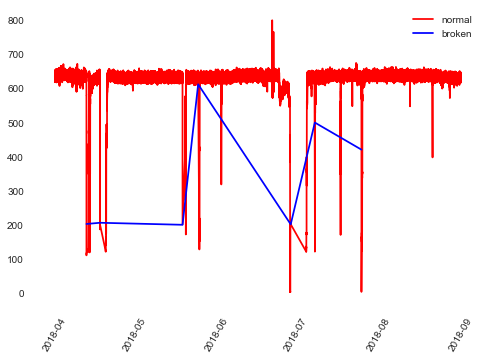

In [91]:
sensor_04_normal=normal['sensor_04']
sensor_04_broken=broken['sensor_04']
_ = plt.plot(sensor_04_normal, color='red', label='normal')
_ = plt.plot(sensor_04_broken, color='blue', label='broken')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=60)
plt.show()

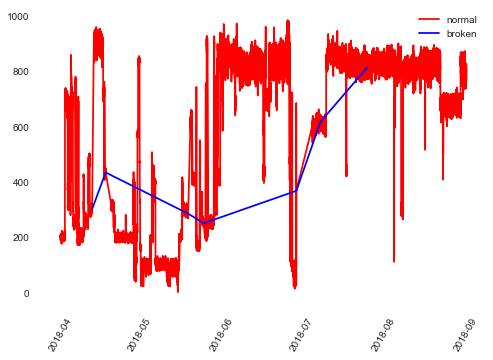

In [87]:
sensor_36_normal=normal['sensor_36']
sensor_36_broken=broken['sensor_36']
_ = plt.plot(sensor_36_normal, color='red', label='normal')
_ = plt.plot(sensor_36_broken, color='blue', label='broken')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=60)
plt.show()

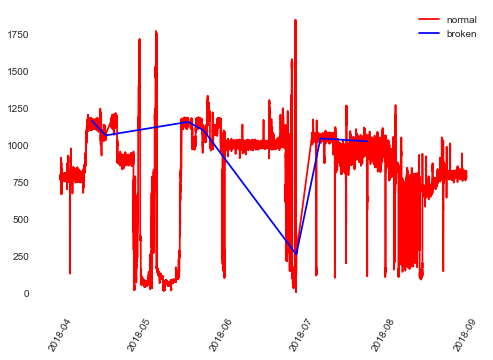

In [88]:
sensor_28_normal=normal['sensor_28']
sensor_28_broken=broken['sensor_28']
_ = plt.plot(sensor_28_normal, color='red', label='normal')
_ = plt.plot(sensor_28_broken, color='blue', label='broken')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=60)
plt.show()

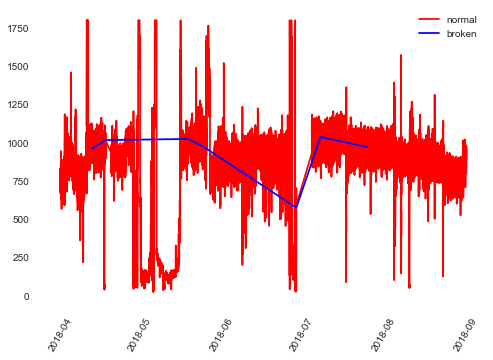

In [89]:
sensor_31_normal=normal['sensor_31']
sensor_31_broken=broken['sensor_31']
_ = plt.plot(sensor_31_normal, color='red', label='normal')
_ = plt.plot(sensor_31_broken, color='blue', label='broken')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=60)
plt.show()

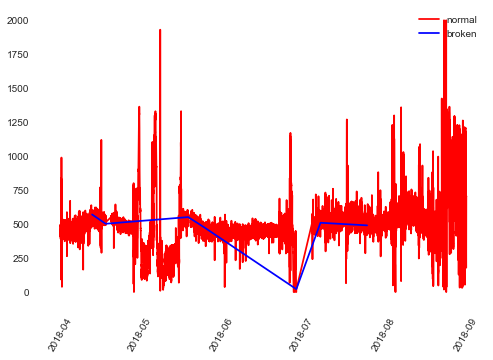

In [90]:
sensor_27_normal=normal['sensor_27']
sensor_27_broken=broken['sensor_27']
_ = plt.plot(sensor_27_normal, color='red', label='normal')
_ = plt.plot(sensor_27_broken, color='blue', label='broken')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=60)
plt.show()

#### 3.5:  Feature Engineering - Reduce the number of features with PCA

In [29]:
from sklearn.preprocessing import StandardScaler
# get the list of features
features=['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
# reset index
df_adj=df_adj.reset_index()
# seperate out the values of the features
x = df_adj.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2', 'pca3', 'pca4'])

In [31]:
finalDf = pd.concat([principalDf, df_adj[['machine_status']]], axis = 1)

In [32]:
finalDf.head()

,pca1,pca2,pca3,pca4,machine_status
0,0.001546,-0.134447,-1.211476,0.033997,NORMAL
1,0.001546,-0.134447,-1.211476,0.033997,NORMAL
2,-0.143510,-0.093341,-1.222340,0.014375,NORMAL
3,-0.162685,-0.231543,-1.274169,0.196821,NORMAL
4,-0.137665,-0.325387,-1.146470,0.328702,NORMAL


In [63]:
pca.explained_variance_ratio_

array([0.35210148, 0.12978194, 0.07513211, 0.06574587])

In [34]:
finalDf.describe().T

,count,mean,std,min,25%,50%,75%,max
pca1,205074.0,-2.517928e-14,4.237601,-6.705044,-2.125639,-1.301323,-0.620200,13.107491
pca2,205074.0,-3.201436e-15,2.572724,-11.500701,-1.551569,-0.103104,1.182476,33.190689
pca3,205074.0,1.458778e-15,1.957487,-4.757737,-1.061060,-0.145446,0.832638,58.675532
pca4,205074.0,4.371986e-15,1.831135,-18.159427,-0.985427,0.192271,1.144730,32.595208
